In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog3.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [2]:
df = df.drop(['Unnamed: 0','NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS'], axis=1)

In [3]:
df = df.replace('C-', 'C')
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
teams = df.Tm.unique()
te_dict = dict(zip(teams, range(len(teams))))
df1 = df1.replace({'Tm': te_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,STL,BLK,TOV,PF,PTS,SOS,Pk,Tm,Year,Pos
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,1.1,2.5,1.6,2.0,11.0,6.65,1,0,2000,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,1.3,2.6,2.5,2.6,13.4,5.84,2,1,2000,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,0.9,0.9,2.3,1.9,18.9,6.27,4,2,2000,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,1.2,0.3,2.2,1.9,13.3,7.07,5,3,2000,1
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,1.0,0.9,1.4,2.0,12.6,8.50,6,4,2000,1


In [4]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,STL,BLK,TOV,PF,PTS,SOS,Pk,Tm,Year,Pos
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,1.1,2.5,1.6,2.0,11.0,6.65,1,0,2000,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,1.3,2.6,2.5,2.6,13.4,5.84,2,1,2000,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,0.9,0.9,2.3,1.9,18.9,6.27,4,2,2000,0
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,1.2,0.3,2.2,1.9,13.3,7.07,5,3,2000,1
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,1.0,0.9,1.4,2.0,12.6,8.50,6,4,2000,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df2 = df1
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2 = df2.dropna()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


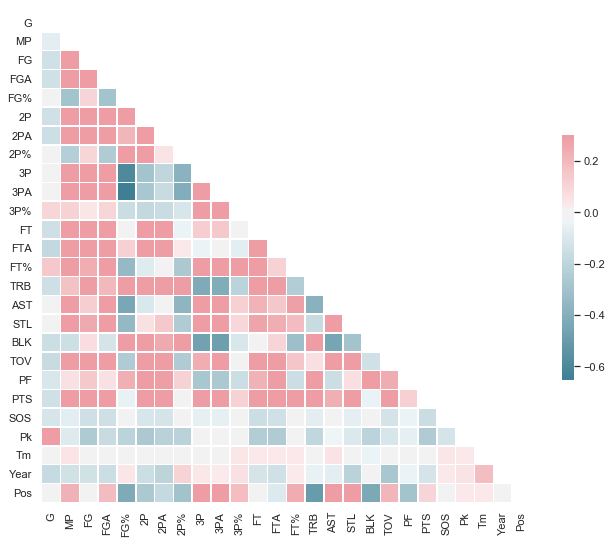

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

## Data Clustering

In [8]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [9]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
subSpace = TSNE().fit_transform(df2.values)
#subSpace = PCA().fit_transform(df3.values)

### K-Means

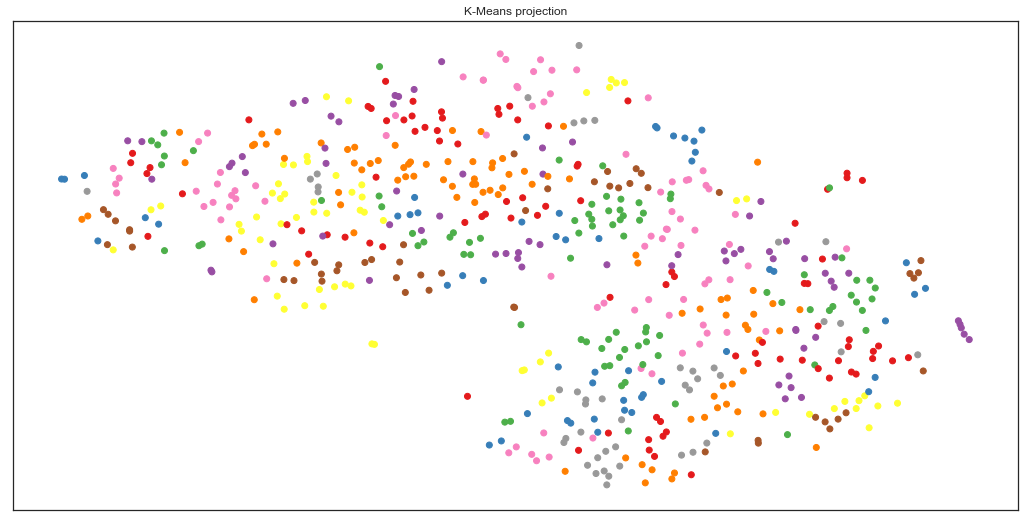

In [11]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=60, max_iter= 10000, n_init=100).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',60)

In [12]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PF,PTS,SOS,Pk,Tm,Year,Pos,label
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.782137,-1.085785,-0.264092,-0.895325,1.930122,0.531776,0.138869,1.396684,-1.345072,-1.389377,...,2.534686,-0.727218,-0.469195,-0.661745,-0.066384,-1.547340,-1.617719,-1.743994,-1.409601,39
Stromile Swift,-0.988082,-0.461221,0.279933,-0.358472,1.464832,0.920187,0.524372,1.301002,-1.082782,-1.084936,...,2.680547,0.552831,0.826939,-0.017441,-0.305199,-1.485316,-1.514547,-1.743994,-1.409601,29
Marcus Fizer,0.272529,0.895590,1.834289,1.395248,0.587939,2.473830,2.580390,0.133681,-1.082782,-1.084936,...,0.200907,0.268376,-0.685218,1.459088,-0.178421,-1.361268,-1.411376,-1.743994,-1.409601,53
Mike Miller,-0.585759,-0.439684,-0.186374,-0.286891,0.086857,-0.322727,-0.589305,0.918274,0.228668,0.335790,...,-0.674259,0.126148,-0.685218,-0.044287,0.057445,-1.299244,-1.308205,-1.743994,-0.747500,11
DerMarr Johnson,-1.470869,-0.267391,-0.264092,-0.286891,-0.002622,-0.711138,-1.017642,1.109638,0.753248,0.792452,...,0.200907,-1.011674,-0.469195,-0.232209,0.479056,-1.237220,-1.205034,-1.743994,-0.747500,11


In [15]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PF,PTS,SOS,Pk,Tm,Year,Pos,label
Name,,,,,,,,,,,,,,,,,,,,,
Carl Landry,-0.612581,0.249489,1.212547,0.178381,2.216454,1.852373,1.124044,2.123868,-1.082782,-1.084936,...,0.055046,1.121742,1.691029,1.324858,0.585196,0.313379,-0.792349,-0.528232,-1.409601,30
Blake Griffin,-0.505295,0.464856,1.834289,0.536283,2.502787,2.629194,1.809383,2.009049,-1.345072,-1.389377,...,0.346769,0.979514,0.610917,1.432242,0.145895,-1.547340,-0.689177,-0.180871,-1.409601,30
Ben Simmons,-1.444047,1.326323,1.367982,0.607863,1.464832,2.163101,1.895051,0.841728,-1.345072,-1.389377,...,0.055046,1.832880,1.258984,1.539626,0.036807,-1.547340,-0.586006,1.034892,0.576703,30
Deandre Ayton,-1.390404,1.024810,2.456032,1.037346,2.395412,2.939923,2.023552,2.257823,-0.951637,-0.932715,...,1.659519,-0.158308,0.178872,1.781239,-0.010366,-1.547340,1.064734,1.382252,-0.085398,30
Gary Trent,0.165243,1.089420,3.000056,1.753149,1.697477,3.639062,3.008728,1.396684,-1.082782,-1.084936,...,0.492630,1.690652,-0.037150,2.479235,-1.971003,0.685523,0.445706,1.382252,-1.409601,30
Zion Williamson,-1.444047,0.271026,3.310928,1.144716,3.612325,3.483698,1.638049,4.401101,-0.427057,-0.323832,...,1.513658,0.410603,-0.253173,2.452389,1.502125,-1.547340,2.096447,1.555933,-1.409601,30


### Agglomerative Clustering

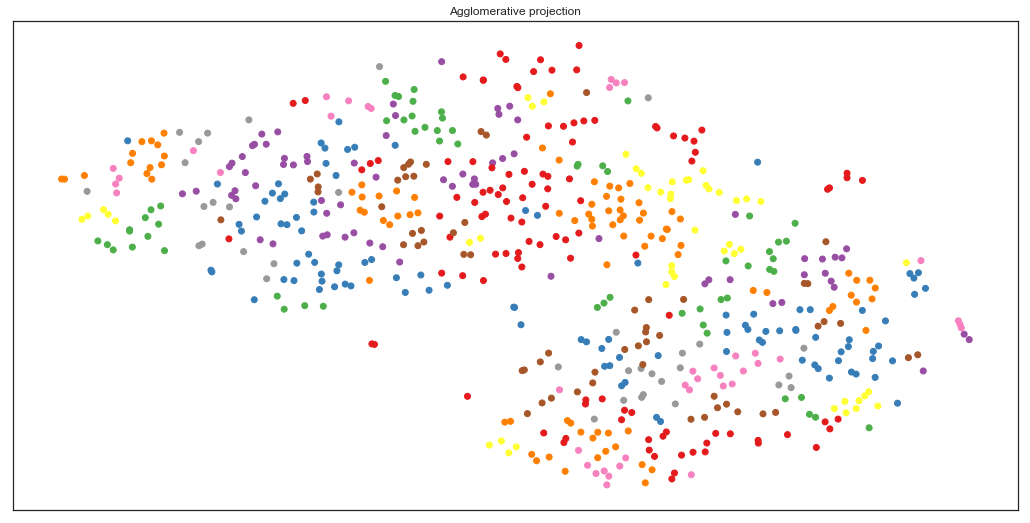

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=60).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'Agglomerative projection',60)

In [17]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PF,PTS,SOS,Pk,Tm,Year,Pos,label
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.782137,-1.085785,-0.264092,-0.895325,1.930122,0.531776,0.138869,1.396684,-1.345072,-1.389377,...,2.534686,-0.727218,-0.469195,-0.661745,-0.066384,-1.547340,-1.617719,-1.743994,-1.409601,42
Stromile Swift,-0.988082,-0.461221,0.279933,-0.358472,1.464832,0.920187,0.524372,1.301002,-1.082782,-1.084936,...,2.680547,0.552831,0.826939,-0.017441,-0.305199,-1.485316,-1.514547,-1.743994,-1.409601,42
Marcus Fizer,0.272529,0.895590,1.834289,1.395248,0.587939,2.473830,2.580390,0.133681,-1.082782,-1.084936,...,0.200907,0.268376,-0.685218,1.459088,-0.178421,-1.361268,-1.411376,-1.743994,-1.409601,5
Mike Miller,-0.585759,-0.439684,-0.186374,-0.286891,0.086857,-0.322727,-0.589305,0.918274,0.228668,0.335790,...,-0.674259,0.126148,-0.685218,-0.044287,0.057445,-1.299244,-1.308205,-1.743994,-0.747500,2
DerMarr Johnson,-1.470869,-0.267391,-0.264092,-0.286891,-0.002622,-0.711138,-1.017642,1.109638,0.753248,0.792452,...,0.200907,-1.011674,-0.469195,-0.232209,0.479056,-1.237220,-1.205034,-1.743994,-0.747500,2


In [19]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PF,PTS,SOS,Pk,Tm,Year,Pos,label
Name,,,,,,,,,,,,,,,,,,,,,
Chris Bosh,-1.497690,0.486393,0.513086,-0.107940,1.464832,0.764823,0.438705,1.109638,-0.427057,-0.679014,...,2.097102,0.268376,0.394894,0.573170,0.313950,-1.361268,-0.482835,-1.222953,-0.085398,4
Andrew Bogut,-0.505295,0.852516,1.445700,0.321542,2.234350,2.085419,1.381046,1.894231,-1.082782,-1.186416,...,1.221935,0.837286,0.178872,0.841630,-0.691429,-1.547340,0.342535,-0.875592,-1.409601,4
Brandon Bass,-0.746688,1.175567,0.279933,-0.179521,1.106916,0.842505,0.652873,0.707773,-0.951637,-1.034195,...,1.513658,-0.442763,-0.037150,0.438940,0.089877,0.437427,1.374248,-0.875592,-1.409601,4
Kevin Love,-1.283118,0.184879,0.823957,0.142591,1.446936,1.075551,0.481538,1.798549,-0.427057,-0.374573,...,0.930213,-0.158308,-0.685218,1.083244,0.246138,-1.299244,0.755220,-0.354551,-0.085398,4
Patrick Patterson,0.272529,1.132493,1.290264,0.321542,1.912226,1.852373,1.252545,1.664594,-1.082782,-1.034195,...,1.221935,-0.727218,-0.253173,0.707400,-0.187266,-0.741028,0.239364,-0.007191,-1.409601,4
Deandre Ayton,-1.390404,1.024810,2.456032,1.037346,2.395412,2.939923,2.023552,2.257823,-0.951637,-0.932715,...,1.659519,-0.158308,0.178872,1.781239,-0.010366,-1.547340,1.064734,1.382252,-0.085398,4
Zion Williamson,-1.444047,0.271026,3.310928,1.144716,3.612325,3.483698,1.638049,4.401101,-0.427057,-0.323832,...,1.513658,0.410603,-0.253173,2.452389,1.502125,-1.547340,2.096447,1.555933,-1.409601,4


### Affinity Propagation

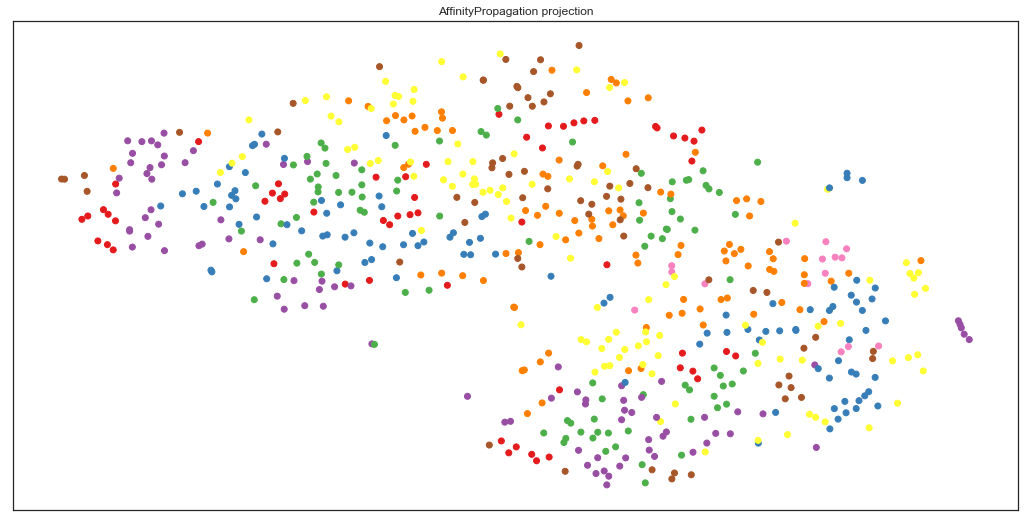

In [20]:
from sklearn.cluster import AffinityPropagation
cluster = AffinityPropagation(convergence_iter=15).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'AffinityPropagation projection',60)

In [21]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PF,PTS,SOS,Pk,Tm,Year,Pos,label
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.782137,-1.085785,-0.264092,-0.895325,1.930122,0.531776,0.138869,1.396684,-1.345072,-1.389377,...,2.534686,-0.727218,-0.469195,-0.661745,-0.066384,-1.547340,-1.617719,-1.743994,-1.409601,7
Stromile Swift,-0.988082,-0.461221,0.279933,-0.358472,1.464832,0.920187,0.524372,1.301002,-1.082782,-1.084936,...,2.680547,0.552831,0.826939,-0.017441,-0.305199,-1.485316,-1.514547,-1.743994,-1.409601,24
Marcus Fizer,0.272529,0.895590,1.834289,1.395248,0.587939,2.473830,2.580390,0.133681,-1.082782,-1.084936,...,0.200907,0.268376,-0.685218,1.459088,-0.178421,-1.361268,-1.411376,-1.743994,-1.409601,18
Mike Miller,-0.585759,-0.439684,-0.186374,-0.286891,0.086857,-0.322727,-0.589305,0.918274,0.228668,0.335790,...,-0.674259,0.126148,-0.685218,-0.044287,0.057445,-1.299244,-1.308205,-1.743994,-0.747500,0
DerMarr Johnson,-1.470869,-0.267391,-0.264092,-0.286891,-0.002622,-0.711138,-1.017642,1.109638,0.753248,0.792452,...,0.200907,-1.011674,-0.469195,-0.232209,0.479056,-1.237220,-1.205034,-1.743994,-0.747500,0


In [22]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PF,PTS,SOS,Pk,Tm,Year,Pos,label
Name,,,,,,,,,,,,,,,,,,,,,
Blake Griffin,-0.505295,0.464856,1.834289,0.536283,2.502787,2.629194,1.809383,2.009049,-1.345072,-1.389377,...,0.346769,0.979514,0.610917,1.432242,0.145895,-1.547340,-0.689177,-0.180871,-1.409601,43
Deandre Ayton,-1.390404,1.024810,2.456032,1.037346,2.395412,2.939923,2.023552,2.257823,-0.951637,-0.932715,...,1.659519,-0.158308,0.178872,1.781239,-0.010366,-1.547340,1.064734,1.382252,-0.085398,43
Gary Trent,0.165243,1.089420,3.000056,1.753149,1.697477,3.639062,3.008728,1.396684,-1.082782,-1.084936,...,0.492630,1.690652,-0.037150,2.479235,-1.971003,0.685523,0.445706,1.382252,-1.409601,43
Zion Williamson,-1.444047,0.271026,3.310928,1.144716,3.612325,3.483698,1.638049,4.401101,-0.427057,-0.323832,...,1.513658,0.410603,-0.253173,2.452389,1.502125,-1.547340,2.096447,1.555933,-1.409601,43
Bol Bol,-2.087763,0.227953,2.689185,1.681569,1.482728,2.396148,2.023552,1.013956,0.490958,-0.019391,...,2.826408,-0.158308,-1.117262,2.022853,-0.219697,-0.679004,-0.895520,1.555933,-0.085398,43


In [23]:
players = df4[df4['label'] == labnum].index.tolist()
players.remove(name)

In [25]:
import numpy as np
stats = [0, 0, 0, 0, 0]
count = 0
statname = ['NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS']
df = pd.read_csv('CollegeRookieStatLog.csv')
for x in range(len(players)):
    df5 = df[df['Name']==players[x]]
    if (len(df5)>0):
        count = count + 1
        for y in range(5):
            stats[y] = stats[y] + df5[statname[y]].values[0]
stats = np.array(stats)
stats = stats/count
for z in range(5):
    stats[z] = round(stats[z], 2)
print(name + ' should put up \033[1m' + str(stats[4]) + ' Points, ' + str(stats[0]) + ' Rebounds, ' + str(stats[1]) + ' Assists, ' + str(stats[2]) + ' Steals, \033[0mand \033[1m' + str(stats[3]) + ' Blocks \033[0min his Rookie season.')

Zion Williamson should put up 19.4 Points, 11.2 Rebounds, 2.8 Assists, 0.85 Steals, and 0.7 Blocks in his Rookie season.
